# **HW 1 - Teeple**

# **2.1 Images**


In [1]:

import cv2
import csv
import numpy as np
from operator import itemgetter
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from google.colab.patches import cv2_imshow



(423, 419)


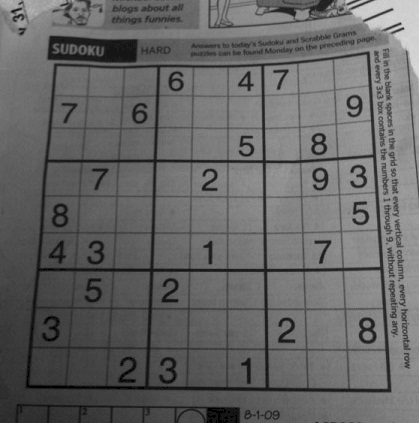

In [2]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ME 592X/ME-592/HW 1/sudoku-original.png',0)
print(img.shape)
cv2_imshow(img)

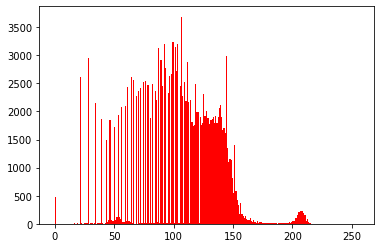

In [3]:

_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

(423, 419, 3)


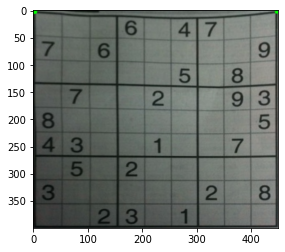

In [4]:

paper = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ME 592X/ME-592/HW 1/sudoku-original.png')
print(paper.shape)
# Coordinates that you want to Perspective Transform

pts1 = np.float32([[54,62],[370,50],[20,437],[395,445]])
# Size of the Transformed Image
pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
for val in pts1:
    cv2.circle(paper,(val[0],val[1]),5,(0,255,0),-1)
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(paper,M,(450,400))
plt.imshow(dst)

# **2.2 Time Series**

Text(0, 0.5, 'Energy')

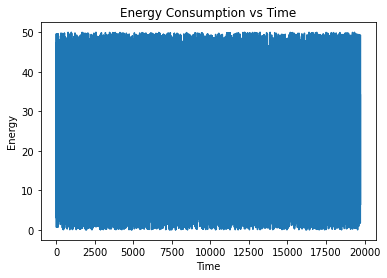

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ME 592X/ME-592/HW 1/energydata_complete.csv', parse_dates=False)
plt.plot(data.Energy_Consumption)
plt.title('Energy Consumption vs Time')
plt.xlabel('Time')
plt.ylabel('Energy')

         


Text(0, 0.5, 'Energy')

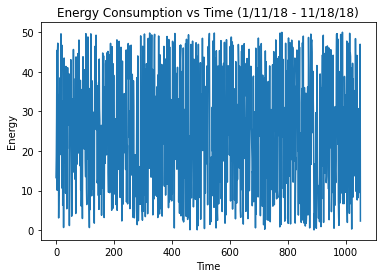

In [6]:
plt.plot(data.Energy_Consumption[0:1051])
plt.title('Energy Consumption vs Time (1/11/18 - 11/18/18)')
plt.xlabel('Time')
plt.ylabel('Energy')

In [80]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ME 592X/ME-592/HW 1/energydata_complete.csv',
                usecols=[0,1,27], names=['Date', 'Appliances', 'Energy_Consumption'], 
                 skiprows=1, index_col=0, parse_dates=[0])

df_m = df.copy()
df_m['hour'] = [i.hour for i in df_m.index]
df_m['day'] = [i.day for i in df_m.index]

df_m.head(5)

df_m.groupby(['day','hour,','Applicances'],sort=False,as_index=False).mean()
#df_m['day'] = pd.to_datetime(df_m['day']).dt.day_name()



#data_pivot = df_m.pivot(index='hour', columns= 'day', values='Appliances')
#sb.heatmap(df_m)
df_m


KeyError: ignored

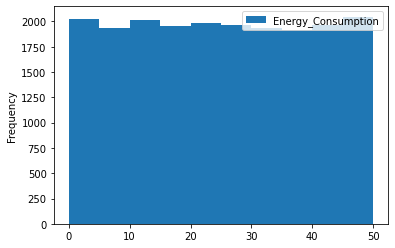

In [85]:
df.plot( x='Appliances', y='Energy_Consumption', kind='hist')

Text(0, 0.5, 'Press_mm_hg')

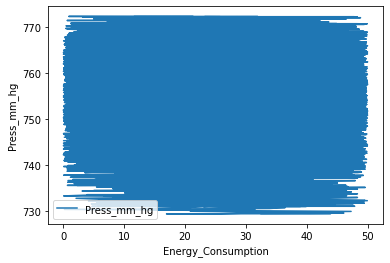

In [92]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ME 592X/ME-592/HW 1/energydata_complete.csv')
df.plot('Energy_Consumption', 'Press_mm_hg')
plt.ylabel('Press_mm_hg')

In [180]:
file = open("/content/drive/MyDrive/Colab Notebooks/ME 592X/ME-592/HW 1/airfoil_self_noise.dat", "r")
from scipy.stats import norm, kurtosis, skew
data = []
Freq = []
Angle = []
Chord = []
Velocity = []
Thickness = []
Output = []
Names = ['Frequency', 'Angle', 'Chord', 'Velocity', 'Thickness', 'Decibel Output']

DATA = []

for line in file:
  stripped_line = line.strip()
  line_list = stripped_line.split()
  data.append(line_list)
file.close()

for i in range(len(data)):
  Freq.append(data[i][0])
  Angle.append(data[i][1])
  Chord.append(data[i][2])
  Velocity.append(data[i][3])
  Thickness.append(data[i][4])
  Output.append(data[i][5])

Freq = list(np.float_(Freq))
Angle = list(np.float_(Angle))
Chord = list(np.float_(Chord))
Velocity = list(np.float_(Velocity))
Thickness = list(np.float_(Thickness))
Output = list(np.float_(Output))

DATA = [Freq, Angle, Chord, Velocity, Thickness, Output]

for x in range(len(DATA)):
  print('Mean-',Names[x], ':', round(np.mean(DATA[x]),2))
  print('Variance-',Names[x], ':', round(np.std(DATA[x]),2))
  print('Median-',Names[x], ':', round(np.median(DATA[x]),2))
  print('Kurtosis-',Names[x], ':', round(kurtosis(DATA[x]),2))
  print('Skewness-',Names[x], ':', round(skew(DATA[x]),2))
  print('Range-',Names[x], ':', round((np.max(DATA[x])-np.min(DATA[x])),2))
  print('\n')














Mean- Frequency : 2886.38
Variance- Frequency : 3151.52
Median- Frequency : 1600.0
Kurtosis- Frequency : 5.69
Skewness- Frequency : 2.13
Range- Frequency : 19800.0


Mean- Angle : 6.78
Variance- Angle : 5.92
Median- Angle : 5.4
Kurtosis- Angle : -0.42
Skewness- Angle : 0.69
Range- Angle : 22.2


Mean- Chord : 0.14
Variance- Chord : 0.09
Median- Chord : 0.1
Kurtosis- Chord : -1.04
Skewness- Chord : 0.46
Range- Chord : 0.28


Mean- Velocity : 50.86
Variance- Velocity : 15.57
Median- Velocity : 39.6
Kurtosis- Velocity : -1.56
Skewness- Velocity : 0.24
Range- Velocity : 39.6


Mean- Thickness : 0.01
Variance- Thickness : 0.01
Median- Thickness : 0.0
Kurtosis- Thickness : 2.21
Skewness- Thickness : 1.7
Range- Thickness : 0.06


Mean- Decibel Output : 124.84
Variance- Decibel Output : 6.9
Median- Decibel Output : 125.72
Kurtosis- Decibel Output : -0.32
Skewness- Decibel Output : -0.42
Range- Decibel Output : 37.61


